In [74]:
from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리

In [75]:
# 농구화 wordcloud
df=pd.read_csv("../crawling/lifestyle_reviews_final.csv",encoding='utf-8-sig')
df.head()

,Product,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,...,Review 101,Review 102,Review 103,Review 104,Review 105,Review 106,Review 107,Review 108,Review 109,Review 110
0,나이키 P-6000,#래트로러닝신발 실물 깡패입니다.어느 코디든 찰떡으로 어울립니다,영롱 그 잡채에요😍😍신랑이랑 같이 신으려고 커플로 구매했어요메탈릭실버 제 최애컬러😍😍,은색이 부담스러울듯 했으나 막상 착용하면 굉장히 예쁩니다. 발도 엄청 편안하고 착화...,"평소에는 나이키 265를 신지만, 반 사이즈 업해서 신으니 좀 더 편하고 좋네요~^...",영롱그자체입니다신랑이랑커플장만하고빨간색들어간것도 삿징ᆢㄷ,요즘 힙하게 옷을 많이 입잖아요~힙한옷에 딱 잘어울리겠다 싶어서 주문하게 되었어요받...,#레트로러닝p6000 실버를 보는순간 이거다!하고 바로 주문했어요 ㅋ워낙 실버색상을...,2년 전에 사서 잘 신고 지내다가 이번에 다른 색깔로 또 구매합니다.여지껏 신어본 ...,디자인과 컬러는 말할것도없이 멋지네요!!무채색옷에 딱이네요.걸을때 착용감&쿠션감 다...,...,일할때 신으려고 때가 잘 안타고 튼튼해보이는녀석으로 구입했는데가볍고 편하고 완전 만...,사진보다 실물이 쩔어요!가을에 어울리는 색이고 착화감도 좋아서 주 5일 출근 중에 ...,화면으로 보는것보다 실물이 더 이쁩니다.가볍고 편안해서 런닝뿐아니라 일상화로 신어도...,은색과 갈색 고민하다가 갈색 갔는데 탁월한 선택이었음. 보이는대로 베이지가 아니라 ...,실물이 예쁘네요 사이즈는 정사이즈 추천드려요 착용감은 좋아요,너무 편하고 색상도 마음에들어요~~! 사이즈는 정사이즈 신으시면 될듯요^^,선물용 으로 구매했습니다색깔도 이쁘고 나이키 한글 포인트가 매력입니다,이뻐요~ 사이즈도 딱맞고 한글 나이키 귀여움 !!,착화감 좋고 실물이 이쁩니다!,진짜 실물이 이쁘고 진짜 가볍습니다 강추요
1,나이키 줌 보메로 롬,#레트로러닝 보메로는 처음인데 가지고 있는 나이키 신발이 눈/비에 취약해서 겨울용 ...,나이키 전모델 거의 250 신어요. 보메로 다른모델 255 신구요. 저는 딱맞게 신...,비오는 날 신기에 적합해요.더 이상 양말이 젖지 않아요.아쉬운 점은 신발 끝이 여유...,"부모님 선물로 샀는데 좋아 하시네요가볍고 튼튼해보이고 눈,비에 강한 소재이고가격은 ...",착화감 굿인데다 가볍고 쌀쌀한 날씨에도 신을 수 있을 거 같아서 좋아요. 메쉬로 되...,고어텍스라고 해서 눈오거나 비오면 신으려고 구매했어요~운동화끈이 고무형식이라 신고벗...,저한텐 딱 정사이즈네요. 발 볼 넓은 분들은 한 치수 업 하시는게 좋을 것 같네요....,평소 반업해서 신는데 이거도 반업하니까 딱 좋아요!! 바람도안들어오고 비오는날 찰떡...,겨울용으로 새로 나온 줌 보메로 롬은 올블랙으로 시크하면서도 멋진 디자인입니다. 1...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,나이키 에어 포스 1 '07 WB,일욜주문 빠른배송으로 오늘받았음평소운동화는 270을신는데 업체마다 타이트하게나와 반...,#멤버데이즈리뷰이벤트 #에어포스1#사랑해 에어포스는 색상도 잘 뽑아내는 것같습니다....,"아들에게 사줬는데, 너무 맘에 들어하네요~빈티지한 느낌과 산뜻한 그린의 로고가 가을...",뒤늦기는 하지만.. 포스의 편안함과 범고래덩크의 매력이 합쳐진 아이를 데려왔습니다 ...,사이즈 정사이즈로 넉넉한편 입니다디자인 이쁘고 뭔가 고급진 느낌이라 여러 하의와 잘...,진심 너무 마음에듬니다 신제품인데도20%할인행사해서 삿어요 기분이좋습니다 사진도 조...,#멤버데이즈리뷰이벤트이번 이벤트로 인해 할인받아서 구매했는데너무 예쁘네요잘 신을게요~^^,밝은 스웨이드 소재와 고무창이 가을옷에 잘어울려요~거기에 초록스우시가 킬링포인트,280에서 반업해 285 발볼넓은 저에게는 아주딱입니다 발도 편하고 착한가격에 잘 ...,...,화이트색상과 고민하다가 신제품이기도 하고 그레이컬러가 튀지 않는 은은함이라 선물로 ...,에어포스 처음사보는데 최고네요다들 에어포스 노래를 부르는 이유가 이해됩니다ㅎㅎ,확실히 기존 에어포스보다 좀 더 포멀해진 느낌입니다.사이즈는 정사이즈 구매하시면 됩니다.,"일반 포스보다 좋네요. 깔창도 틀리고, 내피도 가죽이고.. 가격이 비싸니 뭐 당연한...",받아보니 실물이 더 괜찮네요~~발볼이 넓은편인데 딱맞고 좋습니다.,실물이 훨씬 이쁘네요 역시는역시 굿 좋습니다 정사이즈 추천합니다,에어포스는 설명이 필요 없잔아요 사이즈는 정사이즈가 가는게 좋을듯요 제가 발볼이 넓...,진짜 너무 예쁜데 245가 품절이라 250을 샀는데 좀 커요 아쉽 ㅠㅠㅠㅠ다른 나이...,블프로 반값 득템했슷니다.사이즈 정사이즈 가시면 됩니다.추천합니다.,기존에 흰검 에어포스 꺽어신어서 바꿔야겠다 했는데할인기간에 잘 구매했슷니다.사이즈 ...
3,나이키 C1TY '브라운스톤',포스 265 킬샷 265 시티 265앞에 신발들에 비해 아주 살짝 발볼이 좁게 ...,서플러스 구매했고 너무 마음에 듭니다. 생각보다 가볍고 발도 편안 합니다. 무엇보다...,발볼이 넓은편인데 잘 맞네요. 무엇보다 신발이 이뻐요~,편하게 신고 싶어서 반업해서 구매했습니다. 보기와 다르게 가볍고 편하네요~색감이랑 ...,발볼이 편하다.색이 밝은 편이다.사이즈는 정 사이즈.한 사이즈 커도 좋을 듯 하다.,오랫만에 나이키 신발을 사게 되었네요 ^^디자인 품질 너무 좋네요 코디하기에도 문안...,사이즈 정사이즈나 반사이즈 업해서 신음될듯 합니다.쿠션도 있는편이고..데일리 신발로...,브라운으로 샀는데 반업 하시면 됨 그냥 무난하게 잘 신을 것 같고 생각보다 푹신하네...,평소 275신는데 이신발은 반업해서 280신고있는데 편하고 좋네여 가볍고 색상도 첨...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,나이키 마노아 레더,한번 샀었다가 팔았는데 눈에 아른거려두번째 구매입니더하이라 반업하면 딱맞습니다여기저...,낙넉한 사이즈와 단단한 모양이 아웃도어활동에 좋습니다. 디자인도 깔끔합니다. 밑창도...,#멤버데이즈리뷰이벤트올초에 사이즈가 없어서 구매를 못했었는데 이번 멤버데이즈때 저렴...,"남편이랑 커플 신발로 하나씩 샀는데 사진 그대로 이쁘고, 생각보다 가볍고 가격도 합...",나이키 답게 발볼 좁습니다.천연가죽 합성가죽 혼용인데 비율이 궁금하네요후기대로 워커...,"겨울 코디에 딱이고 특히 발볼이 넓은 이에게 반가운 모델입니다. 디자인, 착화감 다...",정사이즈 색상 좋고 발 딱 맞고 편하고 좋아,디자인 착화감 갑,신발 예쁘고 가볍고 좋습니다.근데 신을때 넘 힘드네요.첨에 발 집어 넣는데 이거 작...,...,적당한 쿠션감. 단단한 내구성.다좋대요.제신랑이요 ㅎ,와이프용으로 사이즈 기다리고 있어요 너무 예뻐요,튼튼하게 생긴 등산화 같은 느낌~~ 좌우당간 좋습니다.,너무 좋다고 난리...또 주문 했다네요....친구 선물로...뭐 편하긴하죠?이쁘긴 ...,싸게 잘샀어요 평소신는 사이즈보다 조금 타이트합니다,왠만한 워커보다 훨 낫습니다.그렇지않아도 신발 닳아서 바꾸고 싶었는데세일하길래 냉큼...,세일하길래 겨울용으로 미리모셨는데 기대됩니다,저렴하게 잘구매했습니다. 정사이즈인듯한데 다른 워커에 비해 아주 가볍고 좋네요. 만...,볼있어서 한치수 크게 주문했고 워커 같은 느낌이네요 디자인 단순하니 이쁨니다,근데좀 바닥이 허접함니다


In [76]:
# 리뷰 합치기
cols=[]
for i in range(110):
    cols.append(f'Review {i+1}')

df['review_combined'] =df[cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
df['review_combined']

0     #래트로러닝신발 실물 깡패입니다.어느 코디든 찰떡으로 어울립니다,영롱 그 잡채에요😍...
1     #레트로러닝 보메로는 처음인데 가지고 있는 나이키 신발이 눈/비에 취약해서 겨울용 ...
2     일욜주문 빠른배송으로 오늘받았음평소운동화는 270을신는데 업체마다 타이트하게나와 반...
3     포스 265  킬샷 265  시티 265앞에 신발들에 비해 아주 살짝 발볼이 좁게 ...
4     한번 샀었다가 팔았는데 눈에 아른거려두번째 구매입니더하이라 반업하면 딱맞습니다여기저...
                            ...                        
94    Incredibly comfortable and versatile, just doe...
95    단정하고 가격대도 착한 신발이요 반업추천!!#멤버데이즈리뷰이벤트,디자인이 맘에 들었...
96    별5개짜리 디자인인데뒷꿈치가 기존 업템포에 비해 많이 낮아서설렁하게 끈 묶으면걸을때...
97    Super comfortable I grabbed soon as they arriv...
98    이 제품 색깔 네이버에서 찜하기 해놨는데 공앱에 들어와서 결제했어요 멤버쉽데이 할인...
Name: review_combined, Length: 99, dtype: object

In [77]:
# 한글 제외 모든 문자 제거
df['review_combined'] = df['review_combined'].str.replace('[^가-힣]', ' ', regex = True)
df['review_combined']

0      래트로러닝신발 실물 깡패입니다 어느 코디든 찰떡으로 어울립니다 영롱 그 잡채에요 ...
1      레트로러닝 보메로는 처음인데 가지고 있는 나이키 신발이 눈 비에 취약해서 겨울용 ...
2     일욜주문 빠른배송으로 오늘받았음평소운동화는    을신는데 업체마다 타이트하게나와 반...
3     포스      킬샷      시티    앞에 신발들에 비해 아주 살짝 발볼이 좁게 ...
4     한번 샀었다가 팔았는데 눈에 아른거려두번째 구매입니더하이라 반업하면 딱맞습니다여기저...
                            ...                        
94                                                  ...
95    단정하고 가격대도 착한 신발이요 반업추천   멤버데이즈리뷰이벤트 디자인이 맘에 들었...
96    별 개짜리 디자인인데뒷꿈치가 기존 업템포에 비해 많이 낮아서설렁하게 끈 묶으면걸을때...
97                                                  ...
98    이 제품 색깔 네이버에서 찜하기 해놨는데 공앱에 들어와서 결제했어요 멤버쉽데이 할인...
Name: review_combined, Length: 99, dtype: object

In [78]:
# Kkma 사용
import konlpy
kkma = konlpy.tag.Kkma() #형태소 분석기 꼬꼬마(Kkma)

nouns = df['review_combined'].apply(kkma.nouns)
nouns

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
java.lang.NullPointerException
	at org.snu.ids.ha.ma.MorphemeAnalyzer.postProcess(MorphemeAnalyzer.java:258)
	at org.snu.ids.ha.index.KeywordExtractor.extractKeyword(KeywordExtractor.java:127)

0     [래트, 러닝, 러닝신발, 신발, 실물, 깡패, 코디, 찰떡, 잡채, 신랑, 커플,...
1     [레트, 러닝, 보메, 처음, 나이키, 신발, 눈, 비, 취약, 겨울, 장만, 디자...
2     [일, 일욜, 일욜주문, 욜, 주문, 배송, 오늘, 평소, 평소운동화, 운동화, 데...
3     [포스, 샷, 시티, 앞, 신발, 발, 발볼, 볼, 실수, 신고, 실, 무엇, 하루...
4     [한번, 눈, 번째, 구, 구매입니더하이, 매입, 니더, 하이, 반, 반업, 업, ...
                            ...                        
94                                                   []
95    [단정, 가격, 가격대, 대, 신발, 신발이요, 이요, 반, 반업추천, 업, 추천,...
96    [별, 개, 디자인, 뒷, 뒷꿈, 꿈, 기존, 업, 업템포, 템포, 끈, 때, 하이...
97                                                   []
98    [제품, 색깔, 네이버, 찜, 공앱, 결제, 멤버쉽, 멤버쉽데이, 데이, 할인, 적...
Name: review_combined, Length: 99, dtype: object

In [79]:
nouns = nouns.explode()
nouns

0        래트
0        러닝
0      러닝신발
0        신발
0        실물
      ...  
98      데이즈
98       이즈
98       리뷰
98    리뷰이벤트
98      이벤트
Name: review_combined, Length: 17524, dtype: object

In [80]:
# pd.set_option('display.max_rows', None)  # 최대 행 수 제한 해제
pd.set_option('display.max_rows', 10) # 10행으로 제한

df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2') # 글자수 2개 이상 가져오기
df_word

,word,count
0,래트,2.0
0,러닝,2.0
0,러닝신발,4.0
0,신발,2.0
0,실물,2.0
...,...,...
98,데이즈,3.0
98,이즈,2.0
98,리뷰,2.0
98,리뷰이벤트,5.0


In [81]:
df_word=df_word.groupby('word',as_index=False).count().sort_values('count', ascending = False)
df_word

,word,count
1895,사이즈,72
350,구매,65
2315,신발,60
3350,정사이즈,57
966,디자인,56
...,...,...
2400,실밥상태,1
2401,실밥작렬,1
890,된장컬러,1
2403,실버느낌,1


In [82]:
# 워드 클라우드 만들기
dic_word = df_word.set_index('word').to_dict()['count']
dic_word

{'사이즈': 72,
 '구매': 65,
 '신발': 60,
 '정사이즈': 57,
 '디자인': 56,
 '발볼': 56,
 '신고': 54,
 '느낌': 52,
 '추천': 51,
 '만족': 50,
 '하나': 50,
 '신어': 49,
 '편안': 49,
 '생각': 49,
 '나이키': 49,
 '평소': 49,
 '이즈': 48,
 '주문': 47,
 '리뷰': 46,
 '제품': 46,
 '불편': 45,
 '반업': 43,
 '착화': 43,
 '착용': 43,
 '색상': 42,
 '발등': 41,
 '쿠션': 40,
 '처음': 40,
 '선물': 38,
 '부분': 38,
 '치수': 38,
 '구입': 38,
 '마음': 37,
 '운동화': 37,
 '나이': 36,
 '업해': 36,
 '배송': 35,
 '감도': 35,
 '포스': 35,
 '가격': 35,
 '신기': 34,
 '에어': 34,
 '컬러': 33,
 '이상': 33,
 '길이': 33,
 '사람': 32,
 '보통': 32,
 '보고': 32,
 '사진': 31,
 '세일': 31,
 '정도': 31,
 '여름': 31,
 '양말': 31,
 '할인': 30,
 '고민': 30,
 '만큼': 30,
 '멤버': 29,
 '감이': 29,
 '실물': 29,
 '하세': 29,
 '블랙': 29,
 '바닥': 28,
 '스타일': 28,
 '칼발': 27,
 '이번': 27,
 '코디': 27,
 '맥스': 26,
 '색감': 26,
 '반사이즈': 26,
 '어디': 26,
 '감사': 26,
 '하다': 26,
 '반품': 25,
 '여유': 25,
 '최고': 25,
 '타이트': 25,
 '걱정': 25,
 '완전': 25,
 '데이': 25,
 '참고': 24,
 '상품': 24,
 '기존': 24,
 '모델': 24,
 '겨울': 23,
 '매장': 23,
 '반업해': 23,
 '강추': 23,
 '기분': 23,
 '선택': 23,
 '착화감': 23

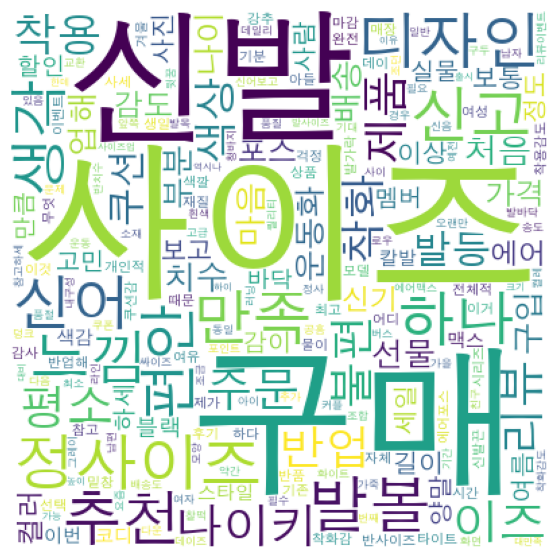

In [83]:
wc = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('lifestyle_wordcloud.png')

In [ ]:
from konlpy.tag import Okt

# Okt 사용
okt=Okt()
nouns_okt = df['review_combined'].apply(okt.nouns)
nouns_okt

0     [래트, 러닝, 신발, 실물, 깡패, 코디, 찰떡, 영롱, 그, 잡채, 신랑, 커플...
1     [레트로, 러닝, 보메, 처음, 가지, 나이키, 신발, 눈, 비, 취약, 겨울, 용...
2     [욜, 주문, 배송, 오늘, 평소, 운동화, 업체, 타이, 트, 반품, 업, 로, ...
3     [포스, 킬샷, 시티, 앞, 신발, 아주, 살짝, 발볼, 신고, 좀, 무엇, 하루,...
4     [한번, 눈, 두번째, 매입, 업, 여기저기, 막, 신기, 낙넉, 사이즈, 모양, ...
                            ...                        
94                                                   []
95    [가격, 대도, 신발, 업, 추천, 멤버, 데이즈, 리뷰, 이벤트, 디자인, 맘, ...
96    [별, 개, 디자인, 꿈, 치가, 기존, 업, 템포, 설렁, 끈, 걸, 때, 하이,...
97                                                   []
98    [이, 제품, 색깔, 네이버, 찜, 앱, 결제, 멤버, 할인, 적용, 더, 기분, ...
Name: review_combined, Length: 99, dtype: object

In [85]:
nouns_okt = nouns_okt.explode()
nouns_okt

0       래트
0       러닝
0       신발
0       실물
0       깡패
      ... 
98    조화로움
98      멤버
98     데이즈
98      리뷰
98     이벤트
Name: review_combined, Length: 32285, dtype: object

In [86]:
df_word_okt = pd.DataFrame({'word' : nouns_okt})
df_word_okt['count'] = df_word_okt['word'].str.len()
df_word_okt = df_word_okt.query('count >= 2') # 글자수 2개 이상 가져오기
df_word_okt

,word,count
0,래트,2.0
0,러닝,2.0
0,신발,2.0
0,실물,2.0
0,깡패,2.0
...,...,...
98,조화로움,4.0
98,멤버,2.0
98,데이즈,3.0
98,리뷰,2.0


In [87]:
df_word_okt=df_word_okt.groupby('word',as_index=False).count().sort_values('count', ascending = False)
df_word_okt

,word,count
1255,사이즈,942
1524,신발,749
220,구매,628
1017,발볼,460
2180,정사,452
...,...,...
1815,오차,1
509,달이,1
1813,오점,1
1812,오전,1


In [88]:
# 워드 클라우드 만들기
dic_word_okt = df_word_okt.set_index('word').to_dict()['count']
dic_word_okt

{'사이즈': 942,
 '신발': 749,
 '구매': 628,
 '발볼': 460,
 '정사': 452,
 '이즈': 424,
 '나이키': 356,
 '디자인': 354,
 '주문': 278,
 '색상': 262,
 '신고': 258,
 '신어': 252,
 '느낌': 244,
 '추천': 210,
 '발등': 208,
 '제품': 207,
 '평소': 200,
 '생각': 180,
 '조던': 178,
 '조금': 175,
 '아주': 172,
 '운동화': 167,
 '배송': 164,
 '실물': 161,
 '쿠션': 159,
 '구입': 157,
 '크게': 153,
 '착용': 149,
 '리뷰': 138,
 '맥스': 137,
 '정말': 137,
 '치수': 132,
 '에어': 131,
 '마음': 130,
 '살짝': 126,
 '역시': 125,
 '고민': 124,
 '컬러': 120,
 '정도': 120,
 '가격': 118,
 '보고': 114,
 '신기': 114,
 '다른': 113,
 '부분': 112,
 '선물': 109,
 '사진': 108,
 '그냥': 107,
 '에어포스': 107,
 '진짜': 104,
 '약간': 99,
 '처음': 95,
 '포스': 94,
 '로우': 93,
 '여유': 91,
 '길이': 89,
 '무난': 87,
 '보통': 86,
 '하나': 83,
 '편이': 81,
 '색감': 79,
 '매우': 78,
 '칼발': 78,
 '할인': 76,
 '겨울': 73,
 '이번': 72,
 '완전': 71,
 '여름': 69,
 '반품': 69,
 '듭니': 67,
 '마감': 63,
 '러닝': 62,
 '양말': 62,
 '블랙': 60,
 '바로': 59,
 '만족': 58,
 '상품': 58,
 '이건': 58,
 '멤버': 57,
 '최고': 55,
 '미드': 55,
 '바닥': 54,
 '덩크': 53,
 '어보': 53,
 '보메': 53,
 '매장': 52,
 '가죽': 52,

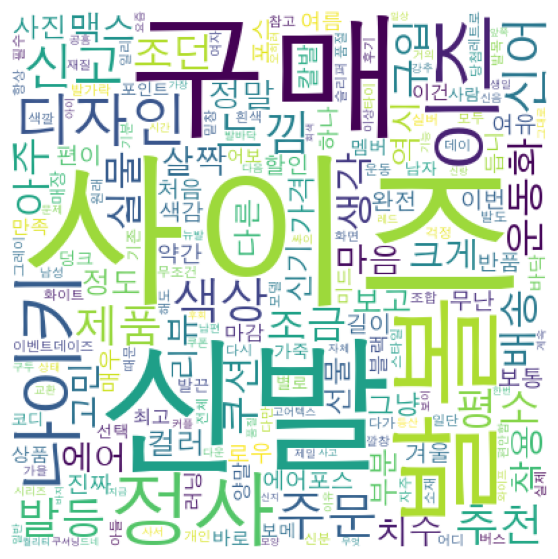

In [89]:
wc_okt = WordCloud(random_state = 123, font_path = 'AppleGothic', width = 400,
               height = 400, background_color = 'white')

img_wordcloud_okt = wc_okt.generate_from_frequencies(dic_word_okt)

plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(img_wordcloud_okt)